## Import Libraries and Modules

In [1]:
import numpy as np  # Imports the NumPy library for numerical operations and array handling.
import pandas as pd  # Imports the pandas library for data manipulation and analysis.
import matplotlib.pyplot as plt  # Imports Matplotlib's pyplot for creating static visualizations.
import seaborn as sns  # Imports Seaborn for statistical data visualization, built on top of Matplotlib.
import plotly.express as px  # Imports Plotly Express for easy-to-use interactive visualizations.
import missingno as msno  # Imports Missingno for visualizing missing data.
from sklearn.pipeline import Pipeline  # Imports Pipeline for creating machine learning workflows.
from sklearn.linear_model import LogisticRegression  # Imports LogisticRegression for classification tasks.
from sklearn.ensemble import RandomForestClassifier  # Imports RandomForestClassifier for ensemble-based classification.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  # Imports metrics for evaluating model performance.
from sklearn.model_selection import train_test_split  # Imports function to split data into training and testing sets.
from sklearn.experimental import enable_iterative_imputer  # Enables the experimental IterativeImputer in scikit-learn.
from sklearn.impute import IterativeImputer, SimpleImputer  # Imports imputers to handle missing data.
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Imports tools for data preprocessing (scaling and encoding).
from sklearn.compose import ColumnTransformer  # Imports ColumnTransformer for applying different preprocessing steps to different columns.
from sklearn.model_selection import GridSearchCV  # Imports GridSearchCV for hyperparameter tuning.
from xgboost import XGBClassifier  # Imports XGBClassifier for gradient boosting-based classification.

import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings to keep the output clean.

### Read and Explore the dataset

In [2]:
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_excel("E_Commerce_Dataset.xlsx", sheet_name="E Comm")

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [6]:
df.shape

(5630, 20)

In [7]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [8]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
PreferredLoginDevice,3
CityTier,3
WarehouseToHome,34
PreferredPaymentMode,7
Gender,2
HourSpendOnApp,6
NumberOfDeviceRegistered,6


In [12]:
df.drop(columns="CustomerID", inplace=True)

In [13]:
#check column names
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [14]:
# Change column names to lowercase
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

#### Create plots

In [15]:
# segment the columns of the DataFrame into two lists based on the number of unique values each column contains.
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)

**Countplots of categorical columns**

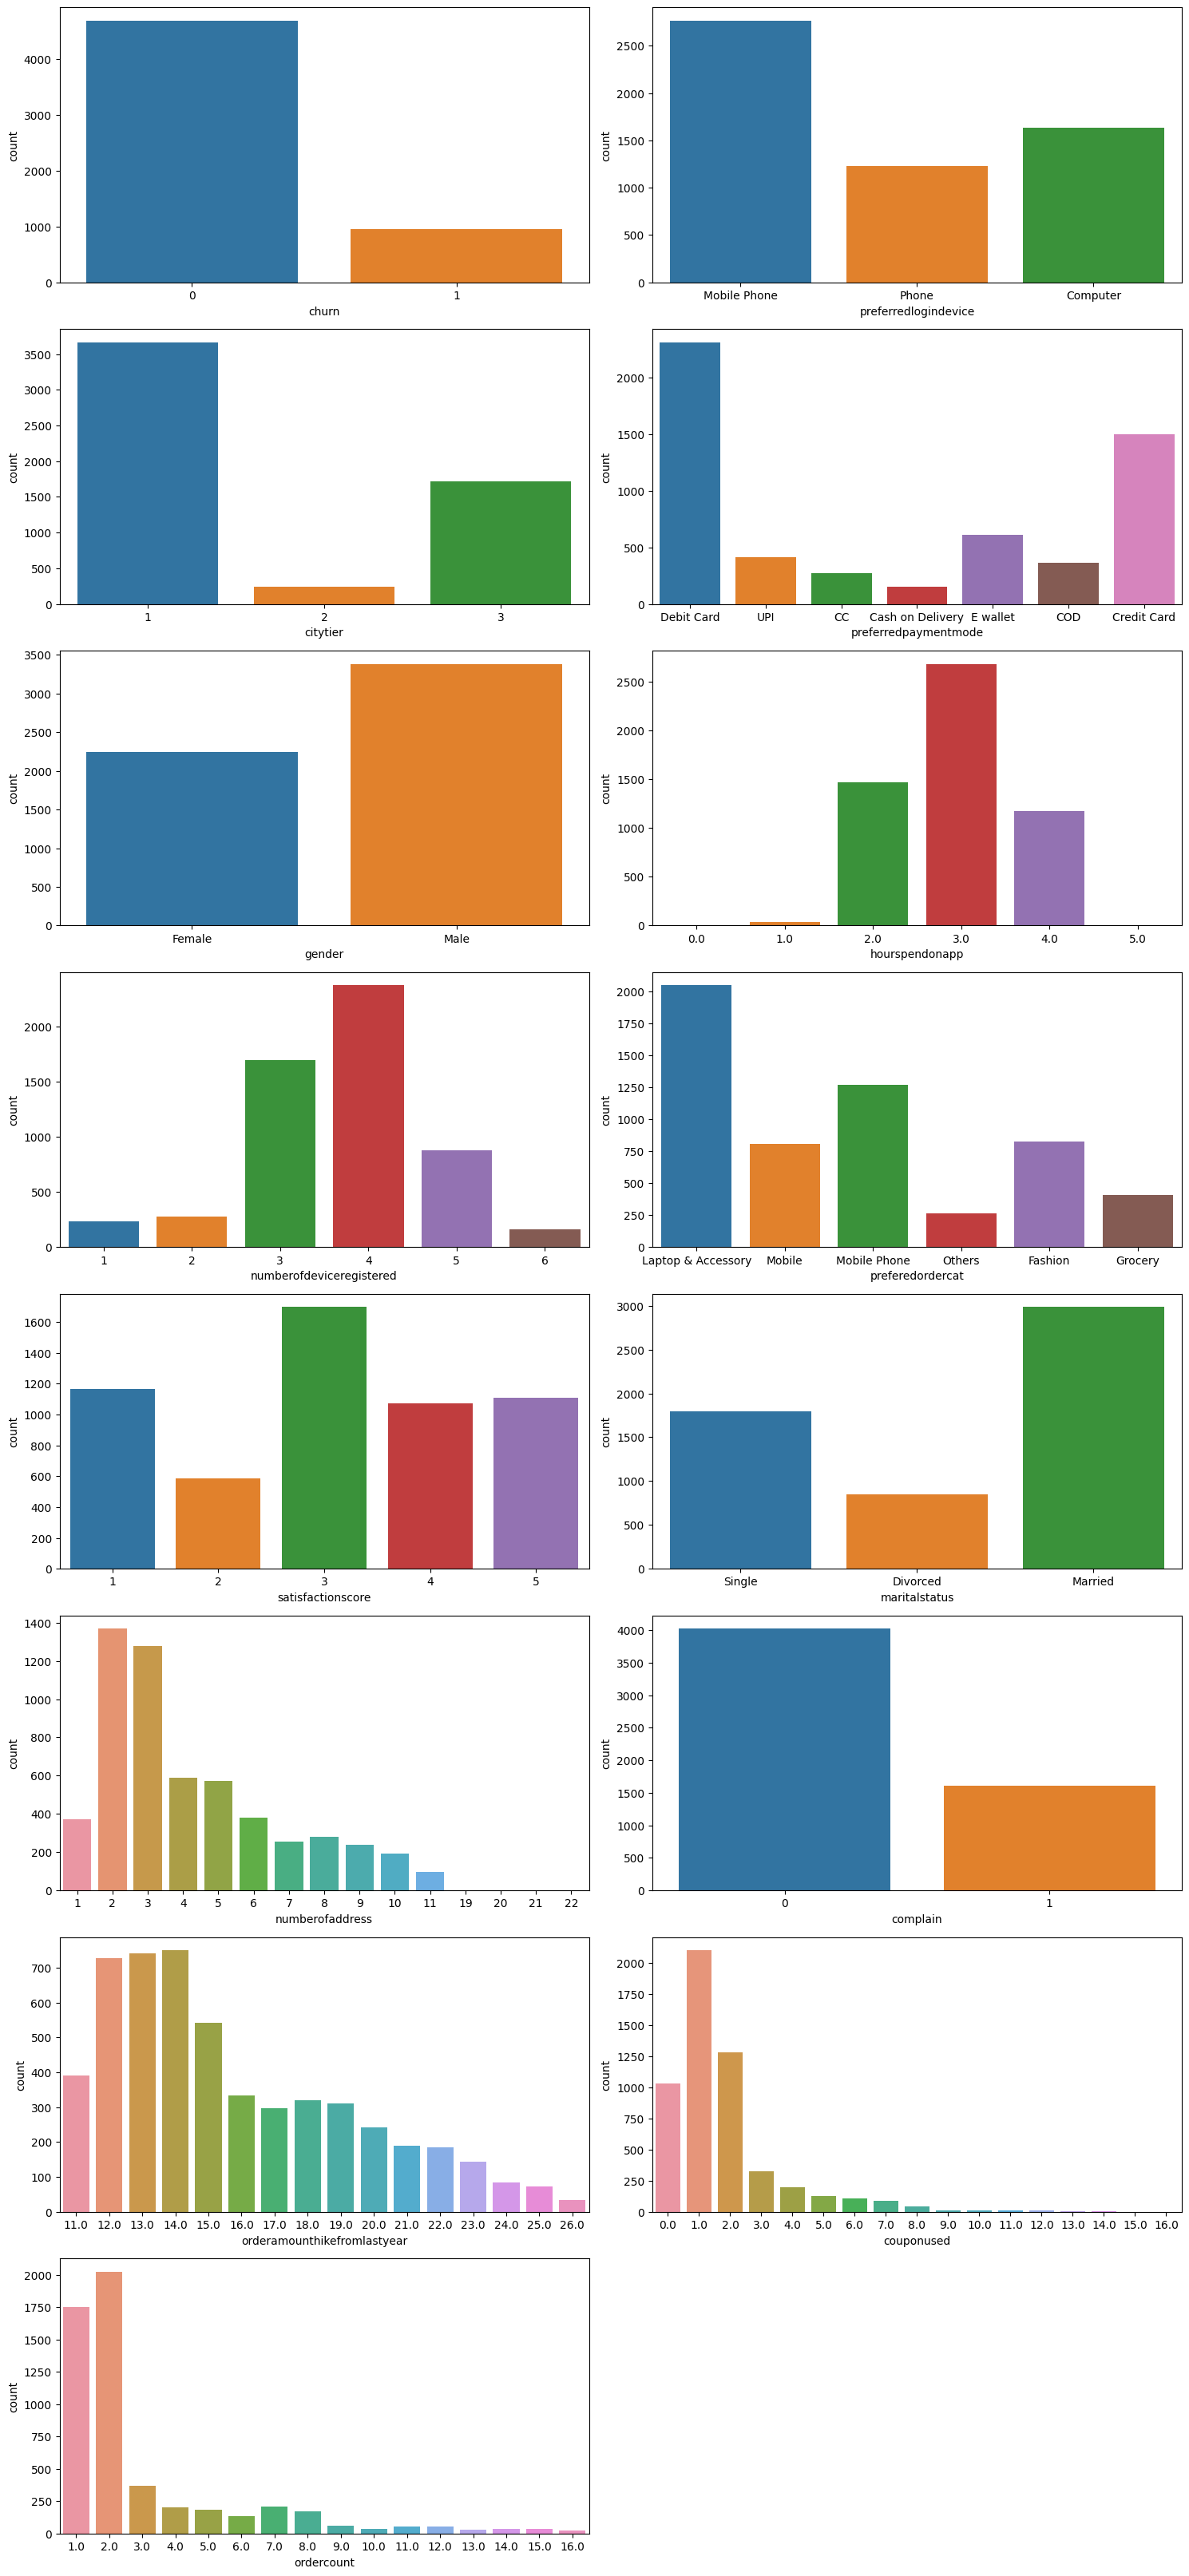

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

**Histograms of numerical columns**

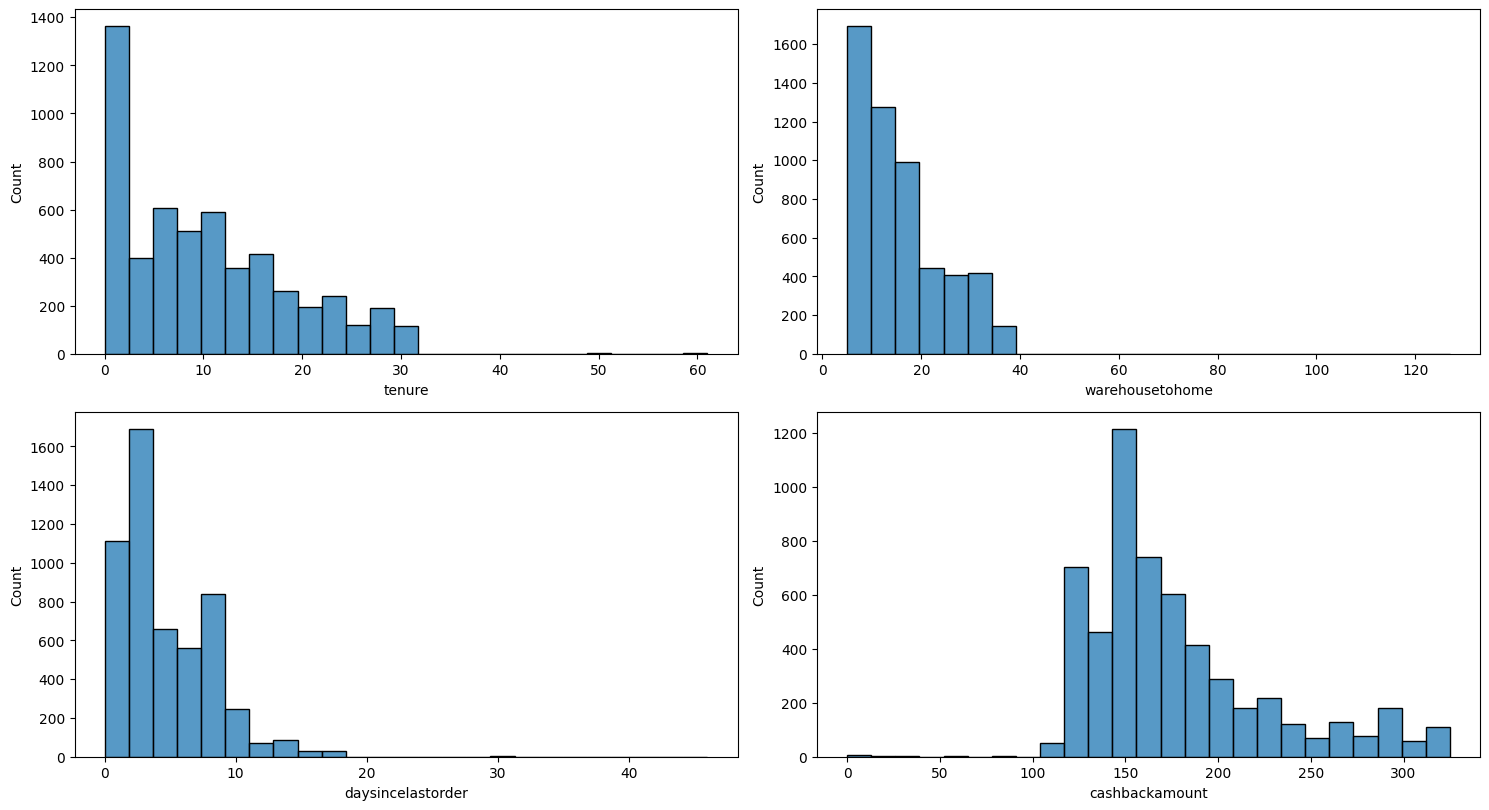

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

**Plot the Churn distribution for each categorical variable**

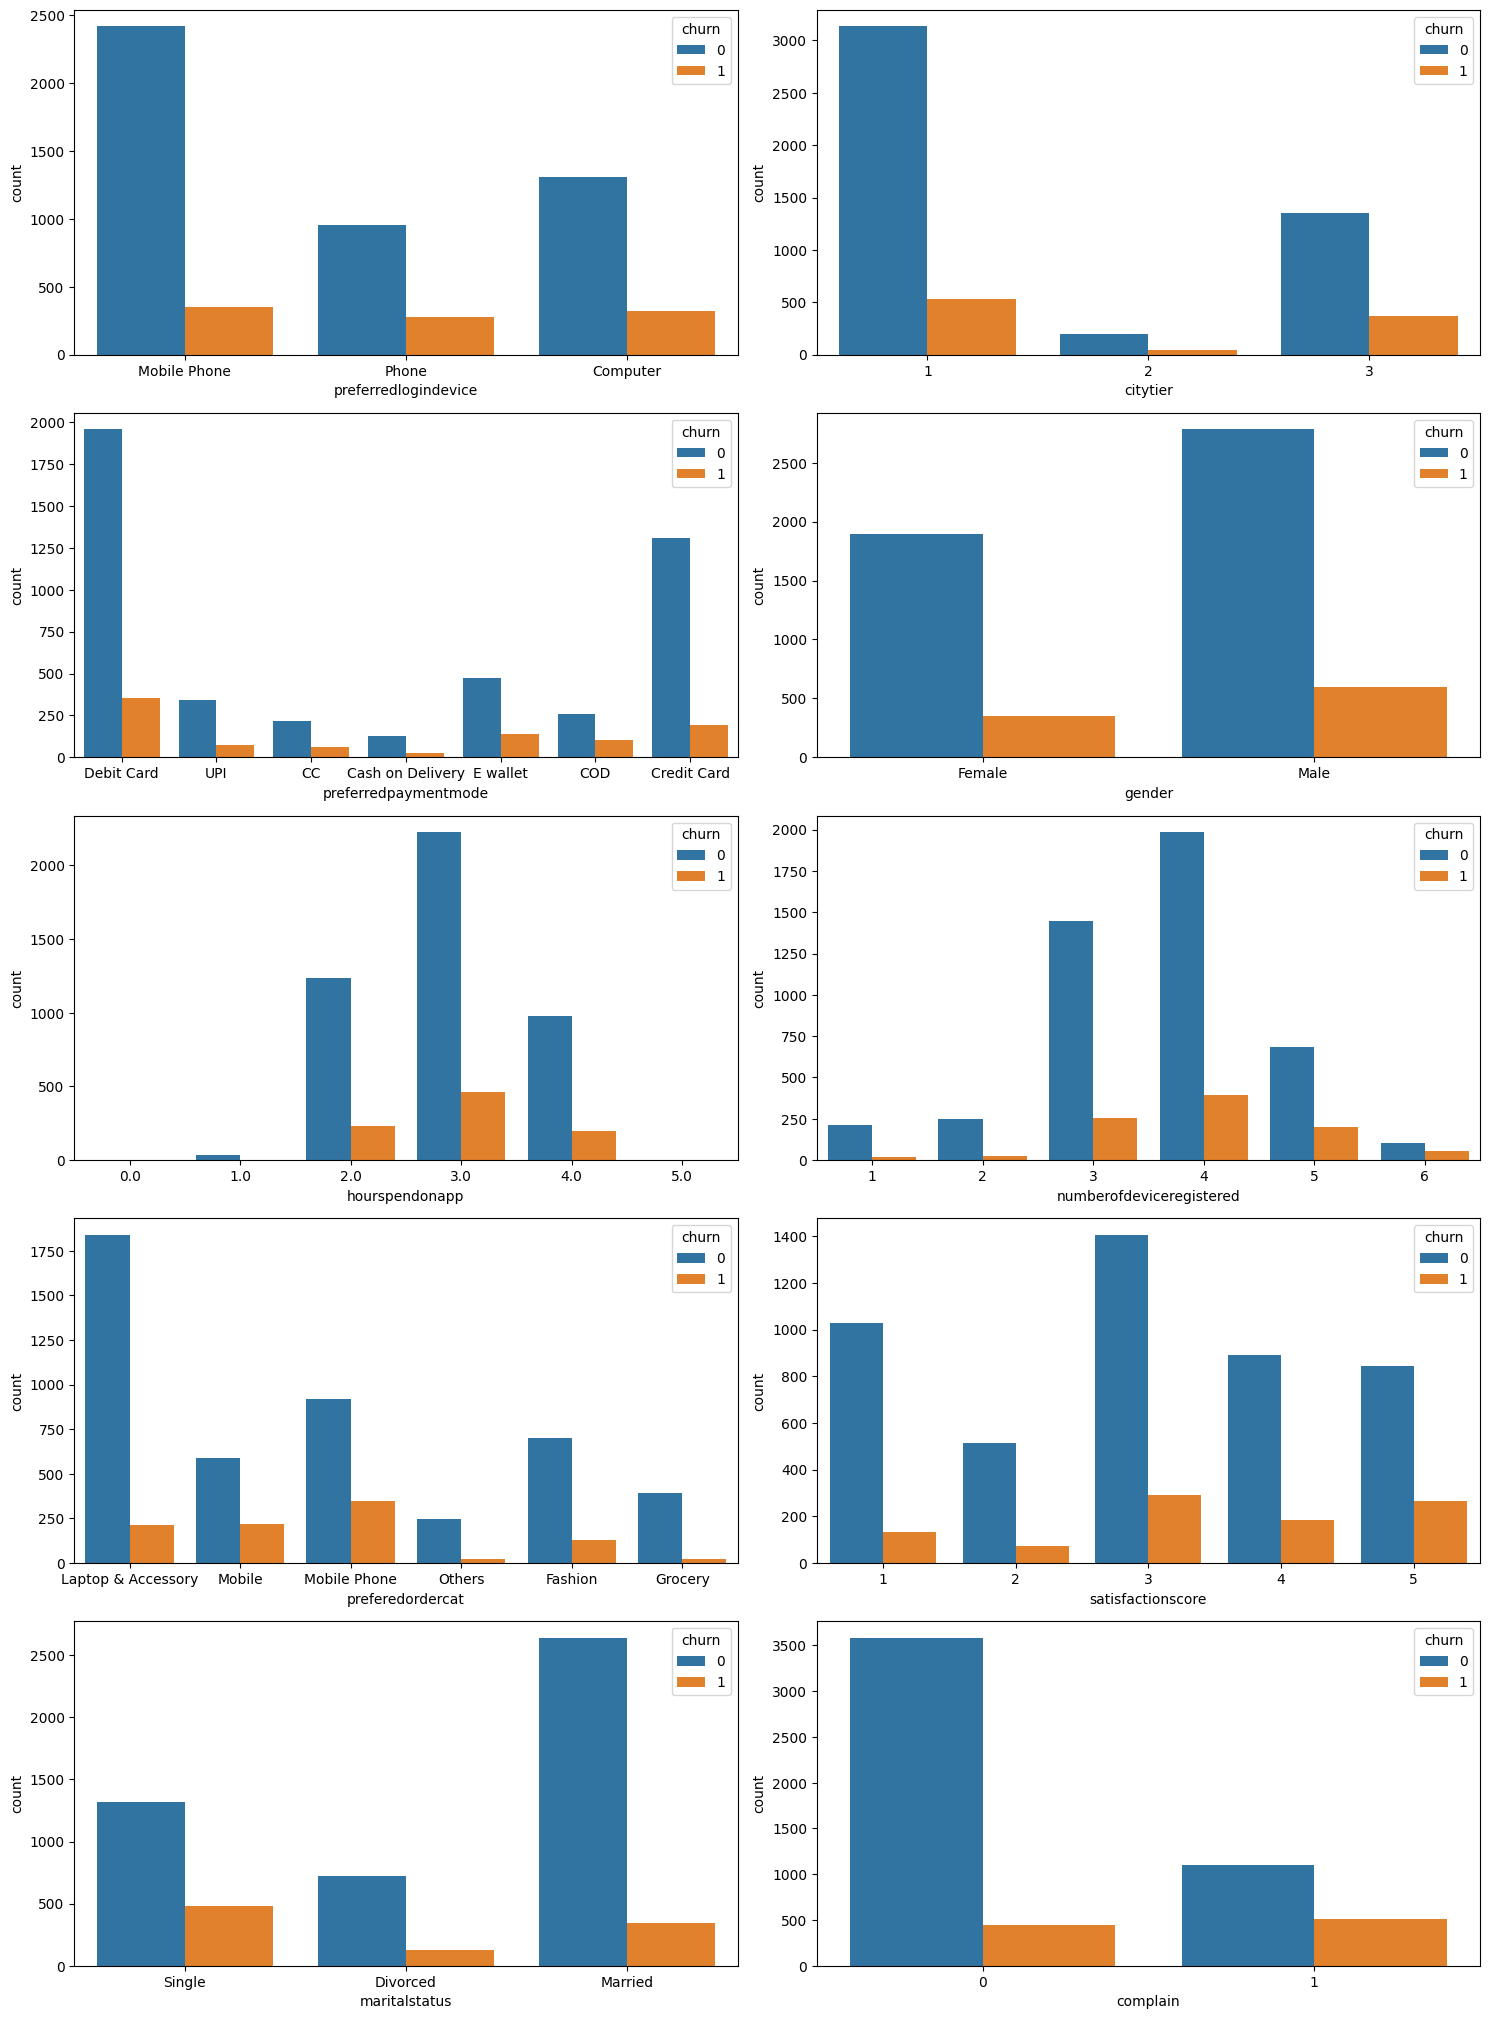

In [ ]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

### Impute Missing Values

In [16]:
from sklearn.impute import SimpleImputer  # Imports SimpleImputer for handling missing data with basic strategies.
from sklearn.experimental import enable_iterative_imputer  # Enables the experimental IterativeImputer in scikit-learn.
from sklearn.impute import IterativeImputer  # Imports IterativeImputer for advanced imputation techniques using iterative models.
from sklearn.ensemble import RandomForestRegressor  # Imports RandomForestRegressor for regression tasks using ensemble methods.
import pandas as pd  # Imports the pandas library for data manipulation and analysis.

def fill_missing_values(df, random_state=None):
    # Step 1: Identify numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()  # Include both string and category data

    # Step 2: Impute numeric columns
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Step 3: Handle categorical columns
    for col in categorical_columns:
        if df[col].dtype == 'object':
            # Convert categorical column to one-hot encoded representation
            encoded_cols = pd.get_dummies(df[col], prefix=col)
            # Concatenate one-hot encoded columns
            df = pd.concat([df.drop(col, axis=1), encoded_cols], axis=1)

    # Step 4: Random Forest Iterative Imputer for the entire DataFrame
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=random_state))
    df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

    return df

# Call the function to fill missing values
df = fill_missing_values(df, random_state=42)

In [17]:
df.head()

,churn,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount,preferredlogindevice_Computer,preferredlogindevice_Mobile Phone,preferredlogindevice_Phone,preferredpaymentmode_CC,preferredpaymentmode_COD,preferredpaymentmode_Cash on Delivery,preferredpaymentmode_Credit Card,preferredpaymentmode_Debit Card,preferredpaymentmode_E wallet,preferredpaymentmode_UPI,gender_Female,gender_Male,preferedordercat_Fashion,preferedordercat_Grocery,preferedordercat_Laptop & Accessory,preferedordercat_Mobile,preferedordercat_Mobile Phone,preferedordercat_Others,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,1.0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Model Building

#### Split Dataset into Training set and Test set

In [18]:
# Split model into training and test set
X = df.drop(columns=["churn"])
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Handling the Imbalanced dataset

In [19]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 3743
Before upsampling count of label 1 761
After upsampling count of label 0 3743
After upsampling count of label 1 3743


**Model Evaluation with Cross Validation**

In [20]:
# Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [21]:
#Initialize the models
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),

    #Nearest Neighbour
    KNeighborsClassifier(),

    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [22]:
# Model Evaluation

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, X, y, cv=5,
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
7,XGBClassifier,99.300000,98.200000,97.600000,97.900000
3,RandomForestClassifier,98.600000,98.900000,92.500000,95.600000
1,BaggingClassifier,98.000000,96.900000,90.900000,93.800000
2,GradientBoostingClassifier,91.900000,85.200000,62.800000,72.200000
4,LogisticRegressionCV,89.400000,77.700000,52.500000,62.600000
0,AdaBoostClassifier,89.000000,72.900000,55.000000,62.500000
6,KNeighborsClassifier,87.500000,70.400000,44.800000,54.800000
5,RidgeClassifierCV,87.400000,86.500000,29.700000,44.300000


In [23]:
final_model=RandomForestClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.9600355239786856

In [25]:
final_model=XGBClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.9769094138543517

**Feature Importance of XGBoost Model**
- Importance_type
    - *‘weight’* - the number of times a feature is used to split the data across all trees.
    - *‘gain’* - the average gain across all splits the feature is used in.

Feature Importance Gain


<Axes: >

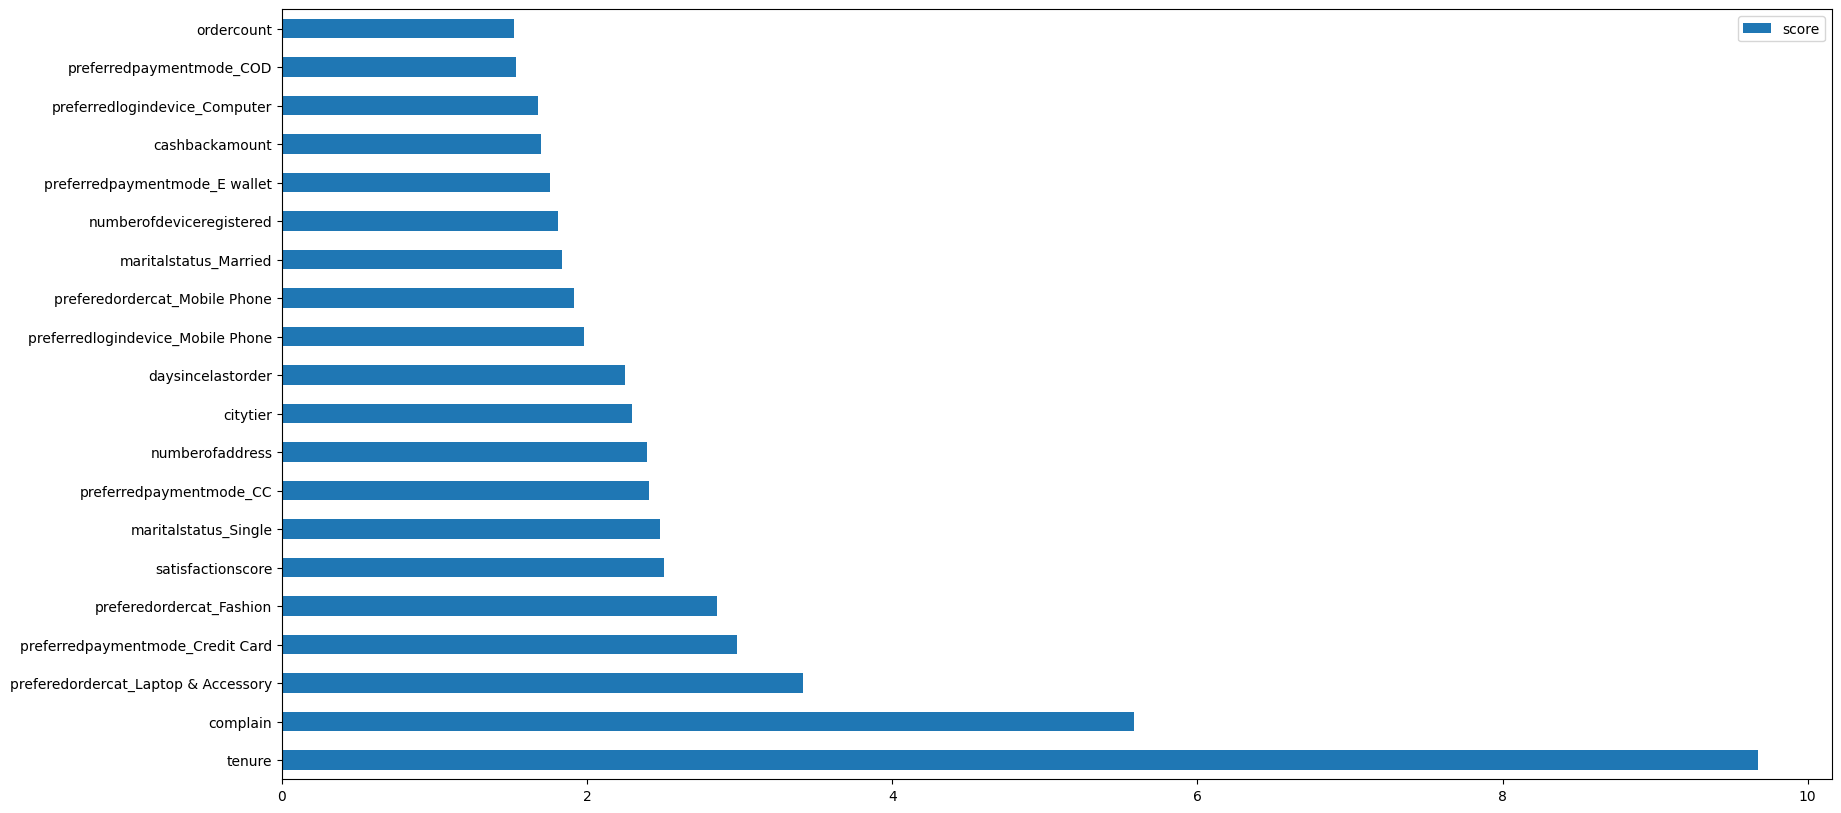

In [27]:
print("Feature Importance Gain")
feature_important = final_model.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

Feature Importance Weight


<AxesSubplot:>

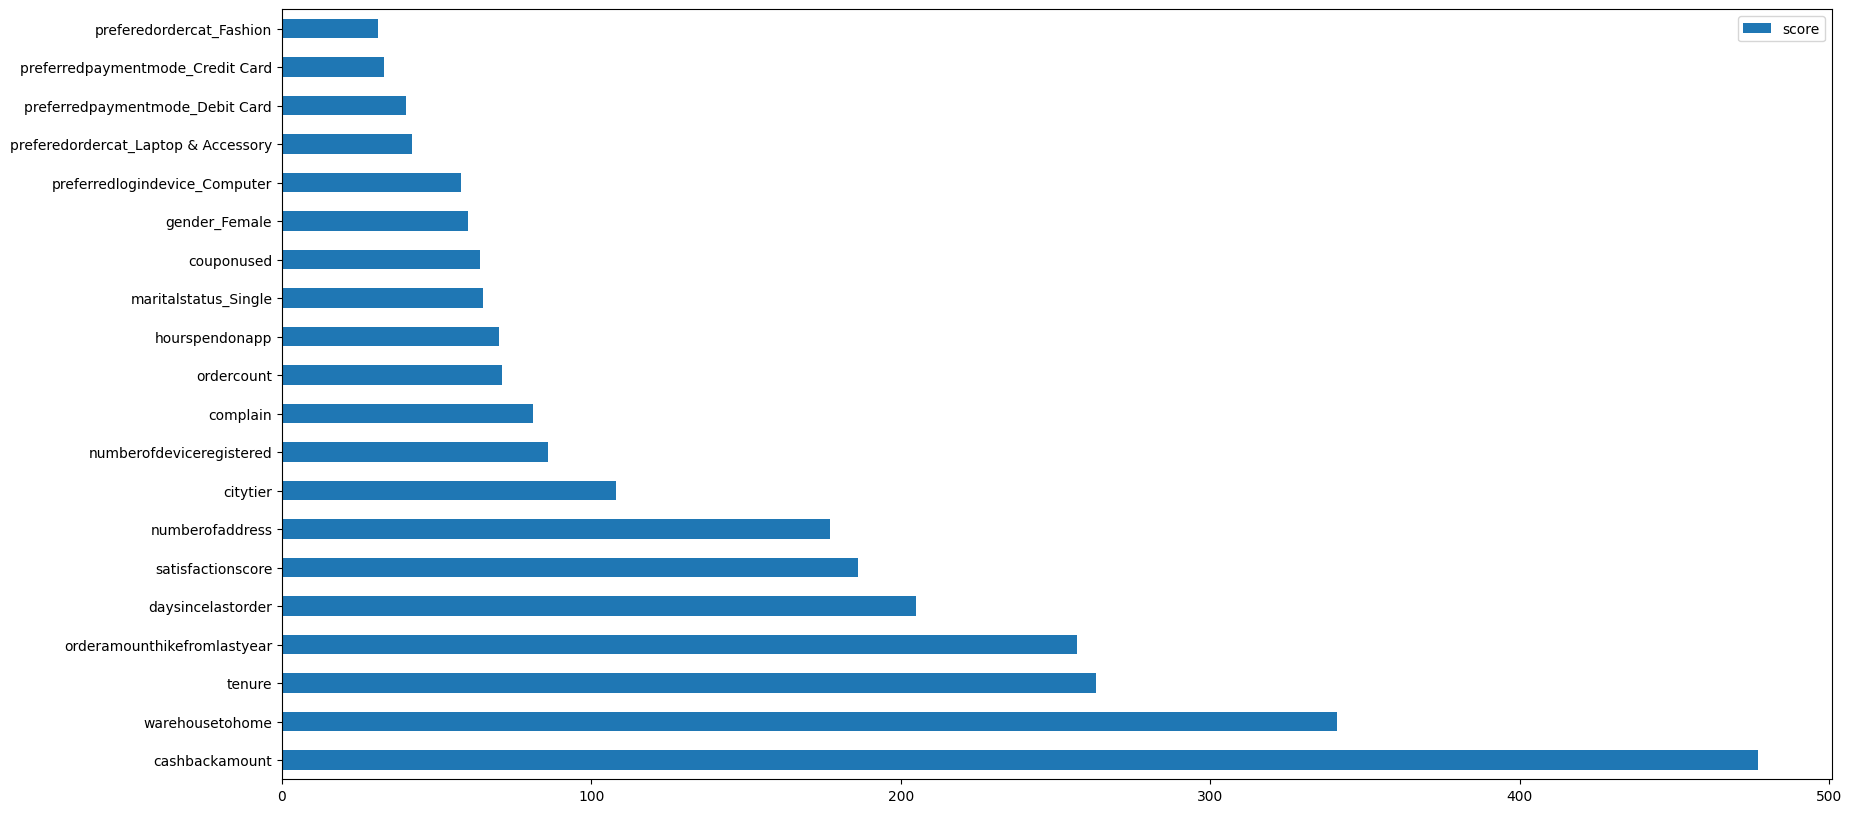

In [ ]:
print("Feature Importance Weight")
feature_important = final_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

### Create Simpler models with less but more important features

- The features that will be used for final deployment model are:
    - Tenure
    - Cashback amount
    - City tier
    - Warehouse to home
    - Order amount hike from last year
    - Days ince lastorder
    - Satisfaction score
    - Number of address
    - Number ofdevice registered
    - Complain
    - Order count
    - hourspendonapp
    - Marital status
    - Coupon used
    - Gender

In [28]:
#select the columns
cols_to_drop = ['preferredlogindevice_Computer', 'preferredlogindevice_Mobile Phone', 'preferredlogindevice_Phone',
                'preferredpaymentmode_CC', 'preferredpaymentmode_COD', 'preferredpaymentmode_Cash on Delivery', 'preferredpaymentmode_Credit Card',
                'preferredpaymentmode_Debit Card', 'preferredpaymentmode_E wallet', 'preferredpaymentmode_UPI', 'preferedordercat_Fashion',
                'preferedordercat_Grocery', 'preferedordercat_Laptop & Accessory', 'preferedordercat_Mobile', 'preferedordercat_Mobile Phone', 'preferedordercat_Others' ]
X.drop(cols_to_drop, axis = 1, inplace = True)

In [29]:
X_train.drop(cols_to_drop, axis = 1, inplace = True)
X_test.drop(cols_to_drop, axis = 1, inplace = True)

In [30]:
X.head()

,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount,gender_Female,gender_Male,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,1.0,0.0,0.0,0.0,1.0
1,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90,0.0,1.0,0.0,0.0,1.0
2,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,0.0,1.0,0.0,0.0,1.0
3,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,0.0,1.0,0.0,0.0,1.0
4,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60,0.0,1.0,0.0,0.0,1.0


### Evaluate the Best Model

In [31]:
# Convert the Pandas datafram to NumPy array for the XGBoost classifier.
# The conversion helps in loading and predicting values in the flask app.

X_test = X_test.values
X_train = X_train.values

In [32]:
# Run the model
final_model=XGBClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.9724689165186501

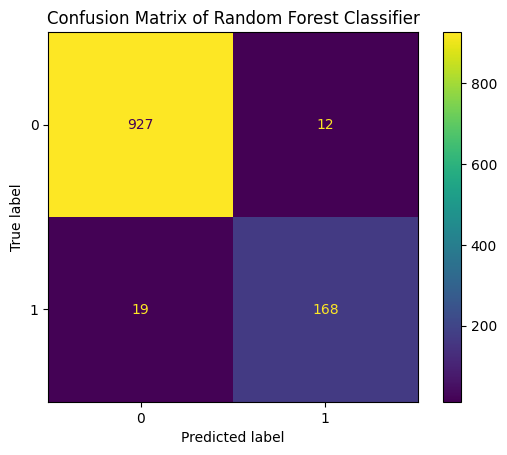

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

**Model Predictions**

In [34]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
XGBoost_df = pd.DataFrame(results, columns=['Actual', 'Predicted'])

# Print the DataFrame
XGBoost_df.tail(10)

,Actual,Predicted
1116,0.0,0
1117,0.0,0
1118,0.0,1
1119,0.0,0
1120,0.0,0
1121,0.0,0
1122,1.0,1
1123,0.0,0
1124,1.0,1
1125,0.0,0


#### Save the model

In [ ]:
import pickle
pickle.dump(final_model,open('end_to_end_deployment/models/churn_prediction_model.pkl','wb'))

In [ ]:
#save the data columns
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("end_to_end_deployment/models/columns.json","w") as f:
    f.write(json.dumps(columns))